# Linear Regression with SGD on Bostons Home Data set

## 1. Reading Boston Home Data set

In [65]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection  import train_test_split




boston = load_boston()
print(boston.data.shape)

import warnings
warnings.filterwarnings("ignore")

(506, 13)


In [66]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [67]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Data set variabe types**

-  `CRIM` => numerical
-  `ZN` => numerical
- `INDUS` => numerical
- `CHAS` => nuerical
- `NOX` => numerical
-  `RM` => numerical
- `AGE` => numerical
- `DIS` => numerical
- `RAD` => numerical
- `TAX` => numerical
- `PTRATIO` => numerical
-  `B` => numerical
- `LSTAT` => numerical

In [68]:
#converting dataset to dataframe
bos = pd.DataFrame(data=boston.data)
bos.columns = boston.feature_names
price = boston.target

data_train, data_test, label_trian, label_test = train_test_split(bos, price, test_size = 0.33, random_state = 5)
print(data_train.shape)
print(data_test.shape)

(339, 13)
(167, 13)


## 2. Standardising train and test data set

since all the given data is numerical we can standardise all the dataser in a single pre processing stpe using StandardScalar

In [69]:
# applying column standardization on train and test data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(np.array(data_train))
x_test=s.transform(np.array(data_test))

#converting data to data to dataframe
data_train_std = pd.DataFrame(data = x_train)
data_test_std  = pd.DataFrame(data = x_test)

data_train_std.columns = boston.feature_names
data_test_std.columns = boston.feature_names

print(data_train_std.head(4))
print(data_test_std.head(4))

       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.911839 -0.502419  1.072305  ...  0.808078 -2.842959  1.523203
1 -0.411727 -0.502419 -1.129795  ... -0.304174  0.427436 -0.995240
2  0.124583 -0.502419  1.072305  ...  0.808078 -0.053353 -0.765646
3 -0.406208  0.839388 -0.901940  ... -0.860301  0.152292 -0.184576

[4 rows x 13 columns]
       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.372923 -0.502419 -0.711561  ... -0.489550  0.318974 -1.331126
1 -0.414165  3.075732 -0.898942  ...  0.344640  0.427436 -1.108619
2 -0.412891 -0.502419 -1.129795  ... -0.304174  0.373661 -0.526132
3  0.905605 -0.502419  1.072305  ...  0.808078  0.427436  3.153033

[4 rows x 13 columns]


## 3. Applying Simple Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm = LinearRegression()
lm.fit(data_train_std, label_trian)

y_pred = lm.predict(data_test_std)


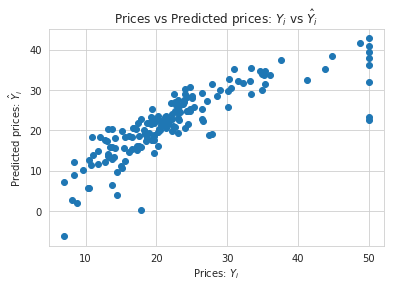

In [71]:
import matplotlib.pyplot as plt

plt.scatter(label_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Error in each test prediction**

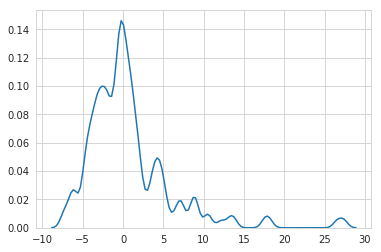

In [72]:
delta_y = label_test - y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

**prediction label plot**

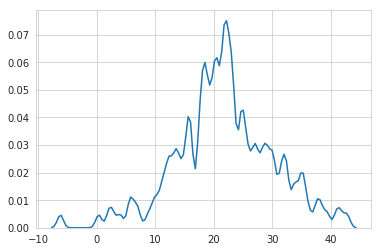

In [73]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

**Total Mean squared Error in normal Linear Regression**

In [74]:
print("length of prediction errors array", len(delta_y))

SE = 0


for i in delta_y:
  sq = i**2
  SE += sq

#mean squere error
MSE = SE / len(delta_y)
print(MSE)
  

length of prediction errors array 167
28.53045876597462


## 3. Applying SGD Algorithm

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [0]:
#we use SGD function module of sklearn


def applySGD(iterations, train_data, labels_train, test_data, labels_test):
  
  print("model started")
  #fit sklearn SGD function\
  model = SGDRegressor(alpha = 0.0001, eta0 = 0.01, learning_rate = 'constant', penalty = None,max_iter = iterations)
  model.fit(train_data, labels_train)
  
  y_pred = model.predict(test_data)
  
  #plotting predicted labels vs actual
  plt.scatter(labels_test, y_pred)
  plt.title("scatter plot between predicted labels and actual labels")
  plt.xlabel("acutal y")
  plt.ylabel("predicted  y")
  plt.grid(b=True, linewidth=0.5)
  plt.show()
  
  #mean squared error
  mse = mean_squared_error(labels_test, y_pred)
  print("mean squared error", mse)
  
  
  return ['sklearn', iterations, 'optimal', round(mse, 2), model.coef_, round(model.intercept_[0], 2)]
  


In [0]:
import math
#function to calculate current y
def currentY(w, x, b):
  y_curr = np.dot(w,x) + b
  
  return y_curr

#custom step function
def stepFunction(r, i):
  r = r / (math.exp(i))
  return r

def returnPredictedArr(data, w_new, b_new):
  y_predicted = []
  for l in range(len(data)):
    y_pred = currentY(w_new, data[l].reshape(13,1), b_new);
    y_predicted.append(y_pred[0, 0])
  
  return y_predicted


In [0]:
from tqdm import tqdm
#  applying sgd using custome function

def Custom_SGD(iterations, train_data, labels_train, test_data, labels_test, batch_size):
  
  #create SGD function
  
  #initial values
  w_new = np.zeros(shape = (1,13))
  b_new = 0
  r = 1
  i = 1
  
  combined_x_trian = train_data
  combined_x_trian['price'] = labels_train
  
  #take random data points equal to batch_size
  combined_trainn_sample = combined_x_trian.sample(batch_size)
  train_data_labels = combined_trainn_sample['price']
  train_data = combined_trainn_sample.drop('price', axis = 1)
  y = np.array(train_data_labels)
  x = np.array(train_data)
  
  #initial mean squared error on test data
  train_loss = 0
  
  print(currentY(w_new, x[1].reshape(13,1), b_new)[0][0])
  
  for i in range(iterations):
    #print(w_new)
    z = 0
    q = 0
    #get derivate of lossfn for hyper plane
    for j in range(batch_size):
      y_curr = currentY(w_new, x[j].reshape(13,1), b_new)
      
      z += (y[j] - y_curr[0, 0]) * (x[j]).reshape(1,13)
      q += (y[j] - y_curr[0, 0])
    
    #step size = 0.01
    w_new = w_new - 2 * 0.01 * (z * (-1/ x.shape[0]))
    b_new = b_new - 2 * 0.01 * (q * (-1/ x.shape[0]))
    
    #print(y[1] - currentY(w_new, x[1].reshape(13,1), b_new)[0][0])
    train_loss_new = mean_squared_error(y, returnPredictedArr(x, w_new, b_new))
    #we stop the loop when train error change in each iteration is less than 0.01
    if(abs(train_loss - train_loss_new) <= 0.0001):
      print(i)
      break
    else:
      train_loss = train_loss_new
    
  
  #print("iterations", len(test_data))
  #print(test_data.loc[1])
  #print(x[1].reshape(13,1))
  #predictions on test data
  y_predicted = []
  print('*' * 50)
  print("intercept of optimal plane", b_new)
  print("weight of optimal plane normal vector", w_new)
  print('*' * 50)
  #print(test_data.loc[j].shape)
  for l in tqdm(range(len(test_data))):
    y_pred = currentY(w_new, np.array(test_data.loc[l]).reshape(13,1), b_new);
    y_predicted.append(y_pred[0, 0])
  
  #plotting predicted labels vs actual
  #print(labels_test[:10])
  #print(y_predicted[:10])
  print('scatter plot to view the relationship between actual label and predicted label')
  plt.scatter(labels_test, y_predicted)
  plt.title("scatter plot between predicted labels and actual labels")
  plt.xlabel("acutal y")
  plt.ylabel("predicted  y")
  plt.grid(b=True, linewidth=0.5)
  plt.show()
  
  #mean squared error
  mse = mean_squared_error(labels_test, y_predicted)
  print("mean squared error", mse)
    
  return  ['custom', iterations, 'custom', round(mse, 2), w_new, round(b_new,2)]
      
  

# Apply Sklearn SGD

model started


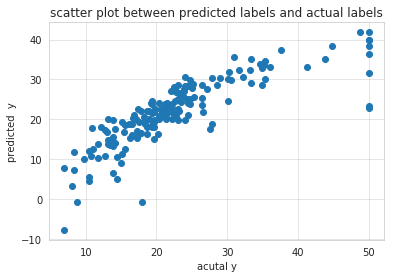

mean squared error 29.613368851786095


In [79]:
#running sklearn based model
sklearn_arr = applySGD(1000, data_train_std, label_trian, data_test_std, label_test)

# Apply Custom SGD

0.0


100%|██████████| 167/167 [00:00<00:00, 3586.49it/s]

**************************************************
intercept of optimal plane 22.751094384363544
weight of optimal plane normal vector [[-1.84274418  1.67072188 -1.22361088  1.60619763 -0.76666468  2.18717672
  -1.69041665 -5.41945837  2.14298479 -1.80788912 -1.7719796   0.5223529
  -4.22387363]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


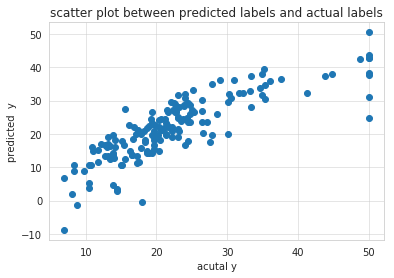

mean squared error 30.678874747679288
0.0


100%|██████████| 167/167 [00:00<00:00, 3776.07it/s]

658
**************************************************
intercept of optimal plane 22.683055487669474
weight of optimal plane normal vector [[-0.67226936  0.50171048  1.17901419  0.39965956 -2.30348329  5.31090186
  -1.52974217 -2.52544676  0.79197221 -1.2855063  -1.76184927  0.23159604
  -1.37581888]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


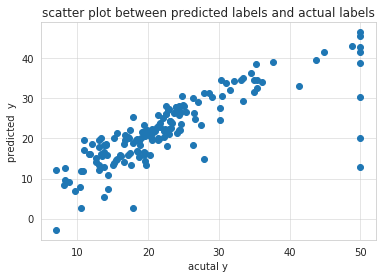

mean squared error 31.194693247451948
0.0


100%|██████████| 167/167 [00:00<00:00, 3629.61it/s]

**************************************************
intercept of optimal plane 22.226270373661528
weight of optimal plane normal vector [[-1.10449223 -1.49237801  0.620626    1.18967172 -0.77290061  3.66130438
  -0.00746624 -0.43123993  2.35773848 -1.2744083  -3.30881375  1.03019689
  -3.61082581]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


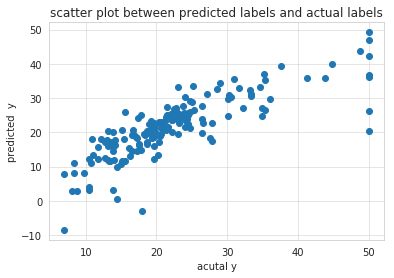

mean squared error 32.833637232727334
0.0


100%|██████████| 167/167 [00:00<00:00, 3419.54it/s]

780
**************************************************
intercept of optimal plane 21.787095752794837
weight of optimal plane normal vector [[-1.79268298  0.44973248 -3.30457353  0.84636522  0.0496859   0.95063997
  -1.14694221 -2.30747953  1.98974076  0.13323779 -2.20858636  0.39797039
  -3.27756662]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


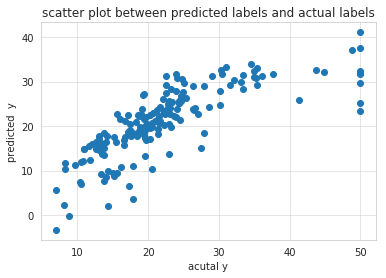

mean squared error 38.580300054957576
0.0


100%|██████████| 167/167 [00:00<00:00, 3557.06it/s]

**************************************************
intercept of optimal plane 22.559624794589904
weight of optimal plane normal vector [[-1.09901919  0.15255161 -0.59082753  0.89679314 -1.44464473  2.65686164
  -0.1922281  -1.9980354   1.58545236 -0.25934638 -3.25366854  1.16390916
  -2.83738429]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


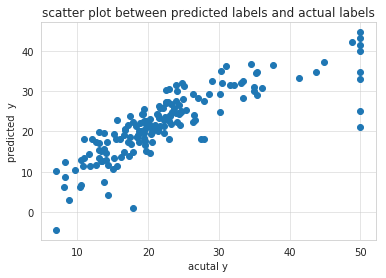

mean squared error 29.221815675097304
0.0


100%|██████████| 167/167 [00:00<00:00, 3854.10it/s]

**************************************************
intercept of optimal plane 21.991292981682783
weight of optimal plane normal vector [[-2.50215329  0.87091877 -1.34552079 -1.38689823 -0.10207988  2.43742412
  -0.97540777 -3.13380374  2.53426165 -2.48244344 -1.94133488  1.05195858
  -2.7515386 ]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


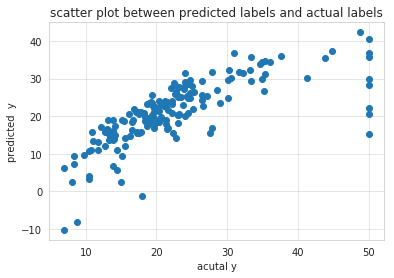

mean squared error 45.626192561604476
0.0


100%|██████████| 167/167 [00:00<00:00, 3513.45it/s]

**************************************************
intercept of optimal plane 21.4912479328181
weight of optimal plane normal vector [[-2.07379962  0.03785697 -1.13132573 -0.16897037 -0.12568998  1.76611964
  -0.71475399 -1.88678616  1.53033438 -0.72011035 -2.15430179  0.57769906
  -3.08565774]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


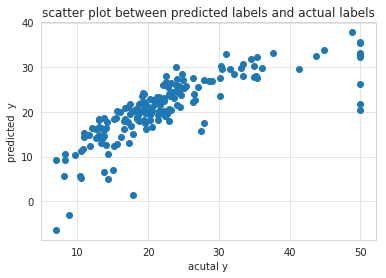

mean squared error 38.47930779980926
0.0


100%|██████████| 167/167 [00:00<00:00, 3790.98it/s]

**************************************************
intercept of optimal plane 21.955130498327513
weight of optimal plane normal vector [[-1.21675943 -0.93698109 -0.40651414  0.19714604  0.23539259  2.30090213
   0.12161485 -0.9078446   1.71244313 -1.24232156 -2.95240196  0.86678448
  -4.85772776]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


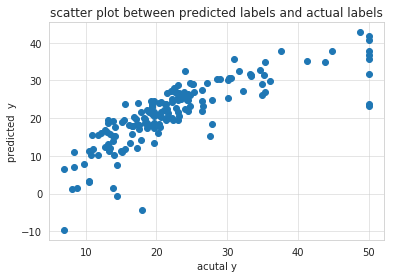

mean squared error 35.034031292732124
0.0


100%|██████████| 167/167 [00:00<00:00, 3940.66it/s]

**************************************************
intercept of optimal plane 22.576085340960223
weight of optimal plane normal vector [[-1.34497603  1.07276917 -0.89922248 -0.09057123 -1.11365915  2.6718983
  -1.43527664 -2.84150697  2.79871778 -2.18146865 -2.65050941  0.16108119
  -2.23103955]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


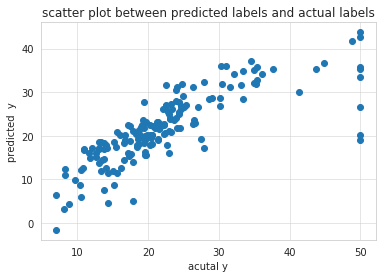

mean squared error 33.81829306796656
0.0


100%|██████████| 167/167 [00:00<00:00, 3498.80it/s]

943
**************************************************
intercept of optimal plane 22.733753044148546
weight of optimal plane normal vector [[-0.8082943   0.56045427  0.32145276 -0.17708496 -0.74764454  4.62408677
  -2.14639457 -3.45844977  1.36441088 -1.95084418 -1.98146941  1.9961613
  -1.5472421 ]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


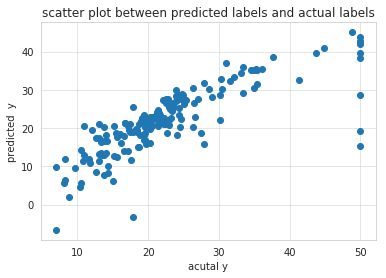

mean squared error 34.49893653005462


In [80]:
c_arr = []
for i in range(10):
  custom_arr = Custom_SGD(1000, data_train_std, label_trian, data_test_std, label_test, 80)
  c_arr.append(custom_arr)

# Conclusions

In [81]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Type", "Iterations", "step size", "mean sqared Error", "weights", "intercept"]

x.add_row(sklearn_arr)
for i in range(10):
  x.add_row(c_arr[i])
print(x)

+---------+------------+-----------+-------------------+---------------------------------------------------------------------------+-----------+
|   Type  | Iterations | step size | mean sqared Error |                                  weights                                  | intercept |
+---------+------------+-----------+-------------------+---------------------------------------------------------------------------+-----------+
| sklearn |    1000    |  optimal  |       29.61       |  [-1.50169959  0.60994477 -0.13597601  0.2360935  -1.43385726  2.58351594 |   22.49   |
|         |            |           |                   |   -0.0840675  -2.81910111  2.70982586 -2.39374973 -2.23621544  1.30426934 |           |
|         |            |           |                   |                                -3.35150995]                               |           |
|  custom |    1000    |   custom  |       30.68       | [[-1.84274418  1.67072188 -1.22361088  1.60619763 -0.76666468  2.18717672

**Custom base model giving less error than sklearn based sgd with same number of iterations but with learning rate 0.01**

**Custom implemetation giving different kind of error for same combinations because of random picking of data points using batch size**